# Neural Networks in python

### Imports

In [113]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.model_selection as sk
import keras.regularizers as reg
import matplotlib.pyplot as plt
import keras.utils as utils

### Feature - Target split

In [114]:
df_eq = pd.read_csv('winequality.csv')

In [115]:
print(df_eq.shape)
df_eq.head()
y = df_eq['quality']
x = df_eq.drop('quality', axis=1)
y.head() 

(1599, 12)


0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [116]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Train - Test split

In [117]:
X_train, X_test, y_train, y_test = sk.train_test_split(
                                   x ,y ,
                                   random_state=104, 
                                   test_size=0.2, 
                                   shuffle=True)

In [118]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1052,5.6,0.605,0.05,2.4,0.073,19.0,25.0,0.99258,3.56,0.55,12.9
175,6.9,0.500,0.04,1.5,0.085,19.0,49.0,0.99580,3.35,0.78,9.5
1001,9.9,0.350,0.38,1.5,0.058,31.0,47.0,0.99676,3.26,0.82,10.6
507,11.2,0.670,0.55,2.3,0.084,6.0,13.0,1.00000,3.17,0.71,9.5
111,8.4,0.620,0.09,2.2,0.084,11.0,108.0,0.99640,3.15,0.66,9.8


In [119]:
y_test.head()

769     5
379     6
1531    5
225     6
1594    5
Name: quality, dtype: int64

### Model Creation

In [120]:
df_model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),

  tf.keras.layers.Dense(32, activation='relu'),

  tf.keras.layers.Dense(1)
])
df_model.compile(loss='mae', optimizer='adam')
df_model.fit(X_train, y_train, epochs=100)

df_model.summary()

Epoch 1/100
40/40 [==============================] - 1s 2ms/step - loss: 5.5490
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.9601
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6050
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5757
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5640
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5496
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5442
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5735
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5538
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5625
Epoch 11/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5651
Epoch 12/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5616
Epoch 13/100
40/40 [=================

### Model Loss Evaluation

In [121]:
losses = df_model.fit(X_train, y_train,
                      validation_data = (X_test, y_test),
                      batch_size = 100,
                      epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 18ms/step - loss: 0.5073 - val_loss: 0.4696
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4875 - val_loss: 0.4670
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.4840 - val_loss: 0.4601
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4855 - val_loss: 0.4852
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4979 - val_loss: 0.4646
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4877 - val_loss: 0.4626
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4792 - val_loss: 0.4724
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4894 - val_loss: 0.4986
Epoch 9/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4857 - val_loss: 0.4612
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4881 - val_loss: 0.4944
Epoch 11

### Model Prediction

In [122]:
pred = df_model.predict(X_test.iloc[1:5])
actual = list(y_test.iloc[1:5])
for i in range(0, len(actual)) :
  print(pred[i], actual[i])

1/1 [==============================] - 0s 130ms/step
[5.6909165] 6
[5.4082026] 5
[5.671468] 6
[5.5886664] 5


In [123]:
type(losses.history)

dict

In [124]:
loss_df = pd.DataFrame(losses.history)
loss_df.head()

,loss,val_loss
0,0.507298,0.469564
1,0.487454,0.467023
2,0.483971,0.460059
3,0.485481,0.485233
4,0.497899,0.464631


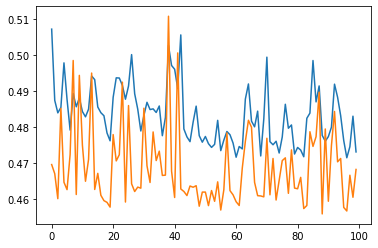

In [125]:
plt.plot(loss_df)

### Model architecture

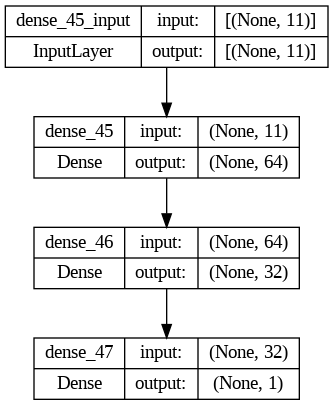

In [126]:
utils.plot_model(df_model, show_shapes=True, show_layer_names=True)

### Regularizers

In [127]:
df_model_reg = tf.keras.Sequential([
  tf.keras.layers.Dense(64, kernel_regularizer=reg.L1(0.01),
    activity_regularizer=reg.L2(0.01), activation='relu'),

  tf.keras.layers.Dense(32, kernel_regularizer=reg.L1(0.01),
    activity_regularizer=reg.L2(0.01), activation='relu'),

  tf.keras.layers.Dense(1)
])
df_model_reg.compile(loss='mae', optimizer='adam')
df_model_reg.fit(X_train, y_train, epochs=100)

df_model_reg.summary()

Epoch 1/100
40/40 [==============================] - 1s 2ms/step - loss: 38.2301
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 19.1514
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 12.1818
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 8.2042
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 5.8098
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 4.3631
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 3.5545
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 3.0262
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 2.7393
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 2.4922
Epoch 11/100
40/40 [==============================] - 0s 2ms/step - loss: 2.3168
Epoch 12/100
40/40 [==============================] - 0s 2ms/step - loss: 2.1964
Epoch 13/100
40/40 [==============

### Regularized loss eval

In [128]:
loss_reg = df_model_reg.fit(X_train, y_train,
                      validation_data = (X_test, y_test),
                      batch_size = 100,
                      epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 31ms/step - loss: 0.6397 - val_loss: 0.5924
Epoch 2/100
13/13 [==============================] - 0s 10ms/step - loss: 0.6391 - val_loss: 0.5882
Epoch 3/100
13/13 [==============================] - 0s 10ms/step - loss: 0.6370 - val_loss: 0.5932
Epoch 4/100
13/13 [==============================] - 0s 10ms/step - loss: 0.6341 - val_loss: 0.5894
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6343 - val_loss: 0.5883
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6348 - val_loss: 0.5880
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6361 - val_loss: 0.5880
Epoch 8/100
13/13 [==============================] - 0s 9ms/step - loss: 0.6328 - val_loss: 0.5869
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6318 - val_loss: 0.5867
Epoch 10/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6315 - val_loss: 0.5908
Epoch

In [129]:
type(loss_reg.history)

dict

### Regularized model prediction

In [130]:
pred = df_model_reg.predict(X_test.iloc[1:5])
actual = list(y_test.iloc[1:5])
for i in range(0, len(actual)) :
  print(pred[i], actual[i])

1/1 [==============================] - 0s 176ms/step
[5.803312] 6
[5.326785] 5
[5.6429944] 6
[5.6465254] 5


In [131]:
loss_reg_df = pd.DataFrame(loss_reg.history)
loss_reg_df.head()

,loss,val_loss
0,0.639745,0.592383
1,0.639079,0.588236
2,0.637042,0.593201
3,0.634059,0.589384
4,0.634330,0.588308


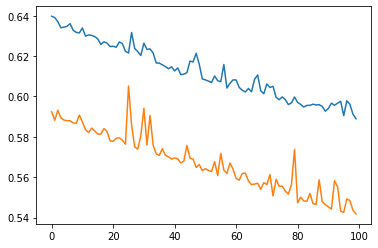

In [132]:
plt.plot(loss_reg_df)

### Regularized model architecture

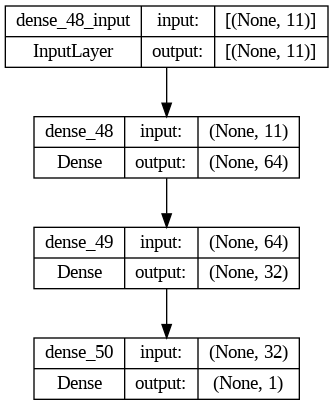

In [133]:
utils.plot_model(df_model_reg, show_shapes=True, show_layer_names=True)

### Sigmoid Model

In [134]:
df_model_reg_sig = tf.keras.Sequential([
  tf.keras.layers.Dense(64, kernel_regularizer=reg.L1(0.01),
    activity_regularizer=reg.L2(0.01), activation='sigmoid'),

  tf.keras.layers.Dense(32, kernel_regularizer=reg.L1(0.01),
    activity_regularizer=reg.L2(0.01), activation='sigmoid'),

  tf.keras.layers.Dense(1)
])
df_model_reg_sig.compile(loss='mae', optimizer='adam')
df_model_reg_sig.fit(X_train, y_train, epochs=100)

df_model_reg_sig.summary()

Epoch 1/100
40/40 [==============================] - 1s 2ms/step - loss: 7.5433
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 4.9949
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 3.4313
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 2.7470
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 2.2419
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 1.8656
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 1.6176
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 1.4608
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 1.3434
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 1.2426
Epoch 11/100
40/40 [==============================] - 0s 2ms/step - loss: 1.1610
Epoch 12/100
40/40 [==============================] - 0s 2ms/step - loss: 1.0880
Epoch 13/100
40/40 [=================

In [135]:
loss_reg_sig = df_model_reg_sig.fit(X_train, y_train,
                      validation_data = (X_test, y_test),
                      batch_size = 100,
                      epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 18ms/step - loss: 0.7428 - val_loss: 0.7051
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.7430 - val_loss: 0.7077
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.7435 - val_loss: 0.7058
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.7418 - val_loss: 0.7045
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.7414 - val_loss: 0.7038
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.7409 - val_loss: 0.7034
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.7413 - val_loss: 0.7043
Epoch 8/100
13/13 [==============================] - 0s 6ms/step - loss: 0.7411 - val_loss: 0.7045
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 0.7408 - val_loss: 0.7036
Epoch 10/100
13/13 [==============================] - 0s 6ms/step - loss: 0.7404 - val_loss: 0.7032
Epoch 11

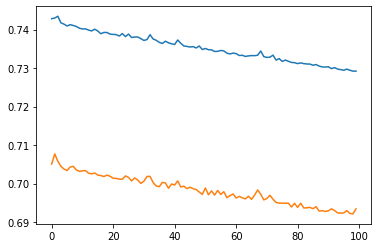

In [136]:
loss_reg_sig_df = pd.DataFrame(loss_reg_sig.history)
plt.plot(loss_reg_sig_df)

### Sigmoid vs Relu model

<Axes: >

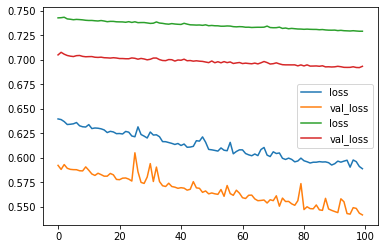

In [137]:
ax1 = loss_reg_df.plot()
loss_reg_sig_df.plot(ax = ax1)